<a href="https://colab.research.google.com/github/JuanJoMontilla/Senales-y-Sistemas/blob/main/Desarrollo%20Parcial%201%20SYS%202024-I/Parcial%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parcial 2**


# **Punto 4**

**Consulte en que consiste la distorcion total de armonicos(Total Harmonic Distortion-(THD)) y el factor de potencia en un circuito electrico.**

**THD:** Consiste en que se parte de un sistema ideal en el que la función de transferencia es lineal e invariante en el tiempo. Cuando una señal sinusoidal de frecuencia ω pasa por un dispositivo no ideal y no lineal, se añade contenido adicional en múltiplos nω (armónicos) de la frecuencia original. La THD es una medida de ese contenido de señal adicional no presente en la señal de entrada. Esta puede ser THD indicandonos con respecto al voltaje o tambien puede ser THDi la cual es con respecto a la corriente.

**FP:** Es la relación entre la potencia real y la potencia aparente en un circuito o sistema de distribución. La potencia real se mide en W o kW, y es la que utilizan los motores, las luces y otros dispositivos para producir trabajo útil. La potencia aparente se mide en VA o kVA, que es la suma vectorial de la potencia real(trabajo util), la potencia reactiva(almacenada y liberada por inductores y condensadores y muestra el desplazamiento de fase entre las formas de onda de corriente y tensión) y la potencia armónica(la cual se pierde por distorsion armonica).


**¿Como puede calcularse el THD desde la FFT?**

Los pasos a seguir serian: 1)Realizar la FFT: Esto transforma la señal del dominio del tiempo al dominio de la frecuencia, permitiendo identificar las diferentes componentes de frecuencia, incluyendo la fundamental y los armónicos. 2)Identificar la frecuencia fundamental: Una vez que se tiene el espectro de frecuencias, se debe identificar la frecuencia fundamental V1, que es la frecuencia más baja y representa la señal principal. 3)Calcular las amplitudes de los armónicos: A partir del espectro de la FFT, se deben extraer las amplitudes de los armónicos
Vn donde n es el número de armónico, comenzando desde el armonico 2 y tomando los componentes de frecuencia que son múltiplos enteros de la frecuencia fundamental. 4)Aplicar la fórmula del THD:

$$THD = \frac{\sqrt{V_2+V_3+\cdots V_n}}{V_1}$$

donde $V_n$ es el valor del $n$-th armónico de la señal de salida del circuito (en términos de tensión) y $V_1$ es la componente (armónico fundamental).

**¿Como puede calcularse la distorsión del factor de potencia con base al THD?**

El factor de potencia de distorsión es la relación entre la potencia real y la potencia aparente debido a la distorsión armónica total (THD). No se pueden añadir condensadores a un circuito para compensar el factor de potencia de distorsión. La impedancia de los condensadores disminuye con la frecuencia. Por lo tanto, un condensador puede convertirse en un sumidero de armónicos de alta frecuencia. Se utilizan tipos especiales de transformadores o filtros armónicos sintonizados que constan de condensadores e inductores para corregir el factor de potencia de distorsión. El factor de potencia de distorsión se calcula de la siguiente manera:

$$PF_{THD}=\sqrt{\frac{1}{1+(THD)^2}}$$

**Genere un ejemplo ilustrativo para el calculo del THD y la distorsion del factor de potencia para un rectificador de onda completa con carga: i)Netamente resistiva y ii)Carga RC en serie.**

**Carga Netamente resistiva**

In [56]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

In [57]:
s = sym.symbols('s', complex=True)
R = sym.symbols('R', positive=True)
X = sym.Function('X')(s)

Y = (1/R*X) / X
Y

1/R

In [58]:
R_v = float(input("Digite el valor de la resistencia en ohmios: "))#Resistencia de la carga
Y_RC = Y.subs(R, R_v)
Y_RC

Digite el valor de la resistencia en ohmios: 1000


0.00100000000000000

In [59]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[1000.    1.]


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

Fo = 60  # Frecuencia de alimentación
Fs = 30 * Fo  # Frecuencia de muestreo
To = 1 / Fo  # Periodo fundamental
Ts = 1 / Fs  # Periodo de muestreo
num_samples = int(5 * To * Fs)  # Número de muestras para 5 periodos de alimentación

# Generar el vector de tiempo usando linspace
t = np.linspace(0, 5 * To, num_samples, endpoint=False)

A = 120  # Amplitud de entrada

# Función de entrada aproximada como onda senoidal rectificada completa
in_o = A * np.sin(2 * np.pi * Fo * t)

# Función tren de pulsos para simular señal rectificada
rec_c = sig.square(2 * np.pi * Fo * t)  # Rectificador de onda completa
# Para rectificador de media onda:
rec_m = 0.5 * (sig.square(2 * np.pi * Fo * t) + 1)
in_ = in_o * rec_c  # Si se quiere probar con rect media onda, usar rec_m
# Evaluar salida ante entrada rectificada mediante aproximación numérica de scipy
# Define G_n como una función o importación adecuada en tu entorno
out = G_n.output(in_, T=t)[1]

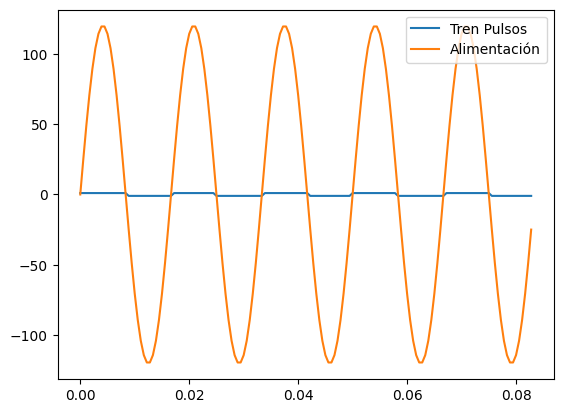

In [61]:
#señales de alimentación y tren de pulsos
plt.plot(t,rec_c,label='Tren Pulsos')
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

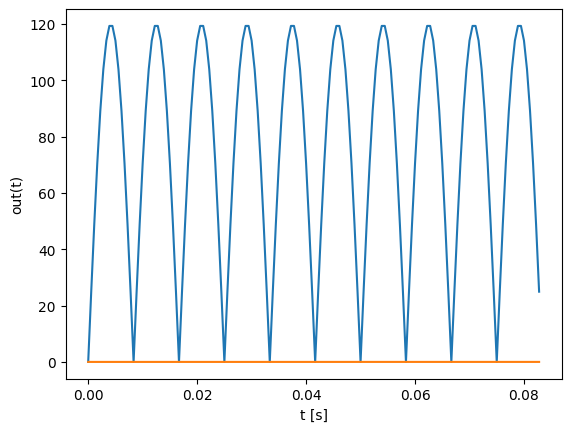

In [62]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

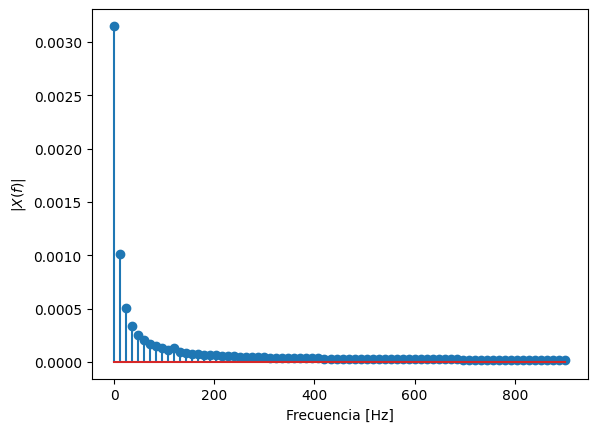

In [63]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

plt.stem(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

In [64]:
funda = vfre[0] #Encuentra la frecuencia fundamental
arms = vfre[(vfre % funda != 0) & (vfre > funda)] #Encuentra los armónicos
v1 = np.abs(Xf[0]) #Calcula la amplitud de la frecuencia fundamental
v_arms = np.abs(Xf[np.in1d(vfre,arms)]) #Calcula las amplitudes de los armónicos
THD = np.sqrt(np.sum(v_arms**2)) / v1 #Calcula el THD

# Calcular el Factor de Potencia (PF) a partir del THD
PF_THD = np.sqrt(1 / (1 + THD**2))

# Imprimir resultados THD y PF
print(f"THD de la señal sumada: {THD:.4f}")
print(f"PF_TH en función del THD: {PF_THD:.4f}")

THD de la señal sumada: 0.4120
PF_TH en función del THD: 0.9246


<ipython-input-64-52889669d547>:2: RuntimeWarning: invalid value encountered in remainder
  arms = vfre[(vfre % funda != 0) & (vfre > funda)] #Encuentra los armónicos


**Carga RC en serie**

In [65]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

In [66]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(R*C*s + 1) * X
Y

X(s)/(C*R*s + 1)

In [67]:
R_v = float(input("Digite el valor de la resistencia en ohmios: "))#Resistencia de la carga
C_v =  float(input("Digite el valor de la capacitancia en faradios: ")) #Capacitancia de la carga
Y_RC = Y.subs(R, R_v).subs(C, C_v)
Y_RC

Digite el valor de la resistencia en ohmios: 1000
Digite el valor de la capacitancia en faradios: 10e-6


X(s)/(0.01*s + 1)

In [68]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v*C_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[0.01 1.  ]


In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

Fo = 60  # Frecuencia de alimentación
Fs = 30 * Fo  # Frecuencia de muestreo
To = 1 / Fo  # Periodo fundamental
Ts = 1 / Fs  # Periodo de muestreo
num_samples = int(5 * To * Fs)  # Número de muestras para 5 periodos de alimentación

# Generar el vector de tiempo usando linspace
t = np.linspace(0, 5 * To, num_samples, endpoint=False)

A = 120  # Amplitud de entrada

# Función de entrada aproximada como onda senoidal rectificada completa
in_o = A * np.sin(2 * np.pi * Fo * t)

# Función tren de pulsos para simular señal rectificada
rec_c = sig.square(2 * np.pi * Fo * t)  # Rectificador de onda completa
# Para rectificador de media onda:
rec_m = 0.5 * (sig.square(2 * np.pi * Fo * t) + 1)
in_ = in_o * rec_c  # Si se quiere probar con rect media onda, usar rec_m
# Evaluar salida ante entrada rectificada mediante aproximación numérica de scipy
# Define G_n como una función o importación adecuada en tu entorno
out = G_n.output(in_, T=t)[1]

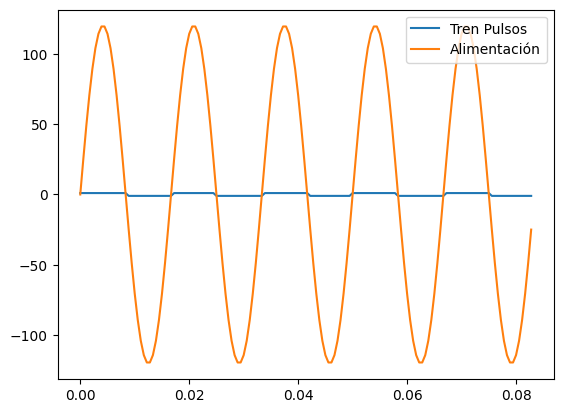

In [70]:
#señales de alimentación y tren de pulsos
plt.plot(t,rec_c,label='Tren Pulsos')
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

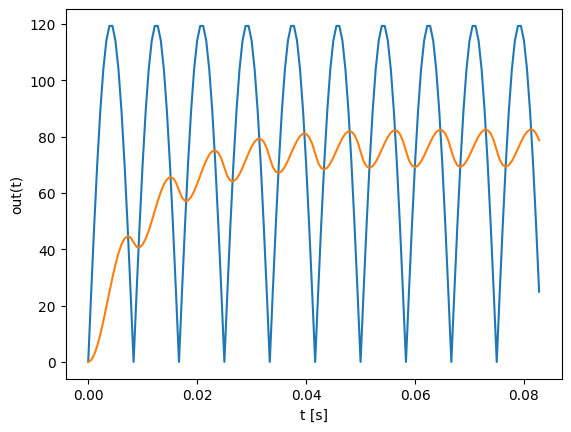

In [71]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

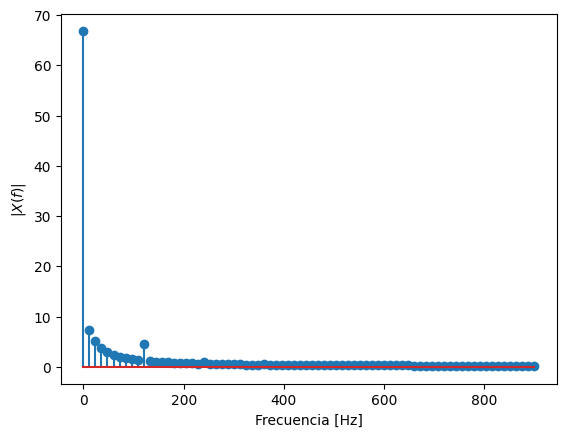

In [72]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

plt.stem(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

In [73]:
funda = vfre[0] #Encuentra la frecuencia fundamental
arms = vfre[(vfre % funda != 0) & (vfre > funda)] #Encuentra los armónicos
v1 = np.abs(Xf[0]) #Calcula la amplitud de la frecuencia fundamental
v_arms = np.abs(Xf[np.in1d(vfre,arms)]) #Calcula las amplitudes de los armónicos
THD = np.sqrt(np.sum(v_arms**2)) / v1 #Calcula el THD

# Calcular el Factor de Potencia (PF) a partir del THD
PF_THD = np.sqrt(1 / (1 + THD**2))

# Imprimir resultados THD y PF
print(f"THD de la señal sumada: {THD:.4f}")
print(f"PF_TH en función del THD: {PF_THD:.4f}")

THD de la señal sumada: 0.1868
PF_TH en función del THD: 0.9830


<ipython-input-73-52889669d547>:2: RuntimeWarning: invalid value encountered in remainder
  arms = vfre[(vfre % funda != 0) & (vfre > funda)] #Encuentra los armónicos
